In [2591]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import plot_spectrals as spec_fun
import importlib
importlib.reload(hfun)
importlib.reload(cf)
importlib.reload(thouless)
importlib.reload(spec_fun)

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit
from os import sep as kPSep
from os.path import exists

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
import copy
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors
from scipy.special import binom
import sympy as sym

print(cf.base_directory)


user_settings = getattr(cf.plot_settings, 'settings')

../results/ISING/disorder/PBC/


### AGP plot function 

In [2592]:
def plot_agp(axis=None, settings_class = None, which=1):
    
    if which < 1 or which > 4: 
        print("Parameter 'which' entered with illegal value")
        return
    #-- main settings
    if settings_class == None:
        settings_class = cf.plot_settings
    settings = getattr(settings_class, 'settings')
    dir = cf.base_directory + "AGP" + kPSep + cf.op_name + kPSep
    param_copy = copy.deepcopy(cf.params_arr)

    #--- prepare scaling - axis
    vals = get_scaling_array(settings=settings)

    y_min = 1.0e10;     y_max = -1.0e10;
    x_min = 1.0e10;     x_max = -1.0e10;
    #--- load data and plot one-by-one
    for x in vals:
        cf.params_arr[settings['scaling_idx']] = x
        if settings['scaling_idx'] == 3 and cf.J0 == 0 and cf.g0 == 0:
            cf.params_arr[4] = int(100 * x / 2.) / 100.
        filename = dir + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat"
        filename2 = cf.base_directory + "STATISTICS" + kPSep + hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs']) + ".dat"
        if exists(filename):
            data = pd.read_table(filename, sep="\t", header=None)
            if "nan" in data[1][1]: continue
            stats = pd.read_table(filename2, sep="\t", header=None)
            wH = (np.array(stats[5][1:])).astype(np.float)
            xdata = (np.array(data[0][1:])).astype(np.float)
            ydata = (np.array(data[which][1:])).astype(np.float) * binom(x, x/2) * np.power(wH, 2.0) / x
            axis.plot(xdata, ydata, label=hfun.key_title(x, settings))
            
            #-- xy-ranges
            mini = ydata.min();  maxi = ydata.max();
            if mini < y_min and np.isfinite(mini): y_min = mini
            if maxi > y_max and np.isfinite(maxi): y_max = maxi
            mini = xdata.min();  maxi = xdata.max();
            if mini < x_min and np.isfinite(mini): x_min = mini
            if maxi > x_max and np.isfinite(maxi): x_max = maxi
    ylab = ""
    if which == 1:
        ylab = "||\\mathcal{A}(A)||^2 / D"
    elif which == 2:
        ylab = "D\\cdot\\omega_H^2\\cdot\\chi^{typ}(A) / L"
    elif which == 3:
        ylab = "\\chi(A)"
    else :
      ylab = "||A||^2_{diag}"  
    hfun.set_plot_elements(axis = axis, xlim = (x_min, x_max), 
                                    ylim = (0.95*y_min, 1.05*y_max), ylabel = ylab, xlabel = settings['vs'], settings=settings, font_size=8)
  
    
    title = ""
    if (settings['vs_idx'] == 3 or settings['scaling_idx'] == 3) and cf.J0 == 0 and cf.g0 == 0 and cf.h != 0:
        title = hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs'], settings['scaling'], 'w') + ',w=0.5h'
    else :
        title = hfun.remove_info(hfun.info_param(cf.params_arr), settings['vs'], settings['scaling'])
    if settings['vs_idx'] != 2 :
        try : 
            title = list(title);    title[title.index('g')] = hfun.var_name;   title = "".join(title) # g
            #title = list(title);    title[title.index('g')] = hfun.var_name;   title = "".join(title) # g0
        except ValueError:
                print("not found")
    axis.title.set_text(r"$%s$"%title[1:])
    axis.title.set_fontsize(10)
    #---Thouless times
    
    #--- reset defaults
    cf.params_arr = param_copy

# PLOT SPECTRAL FUNCTIONS

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[14, 1.0, 0.9, 0.8, 0.1, 0, 1, 1, 0.0, 0.0]
[11 12 13 14 15 16]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5 ]


ValueError: min() arg is an empty sequence

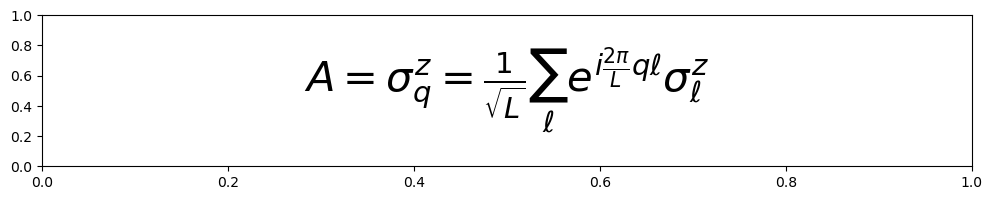

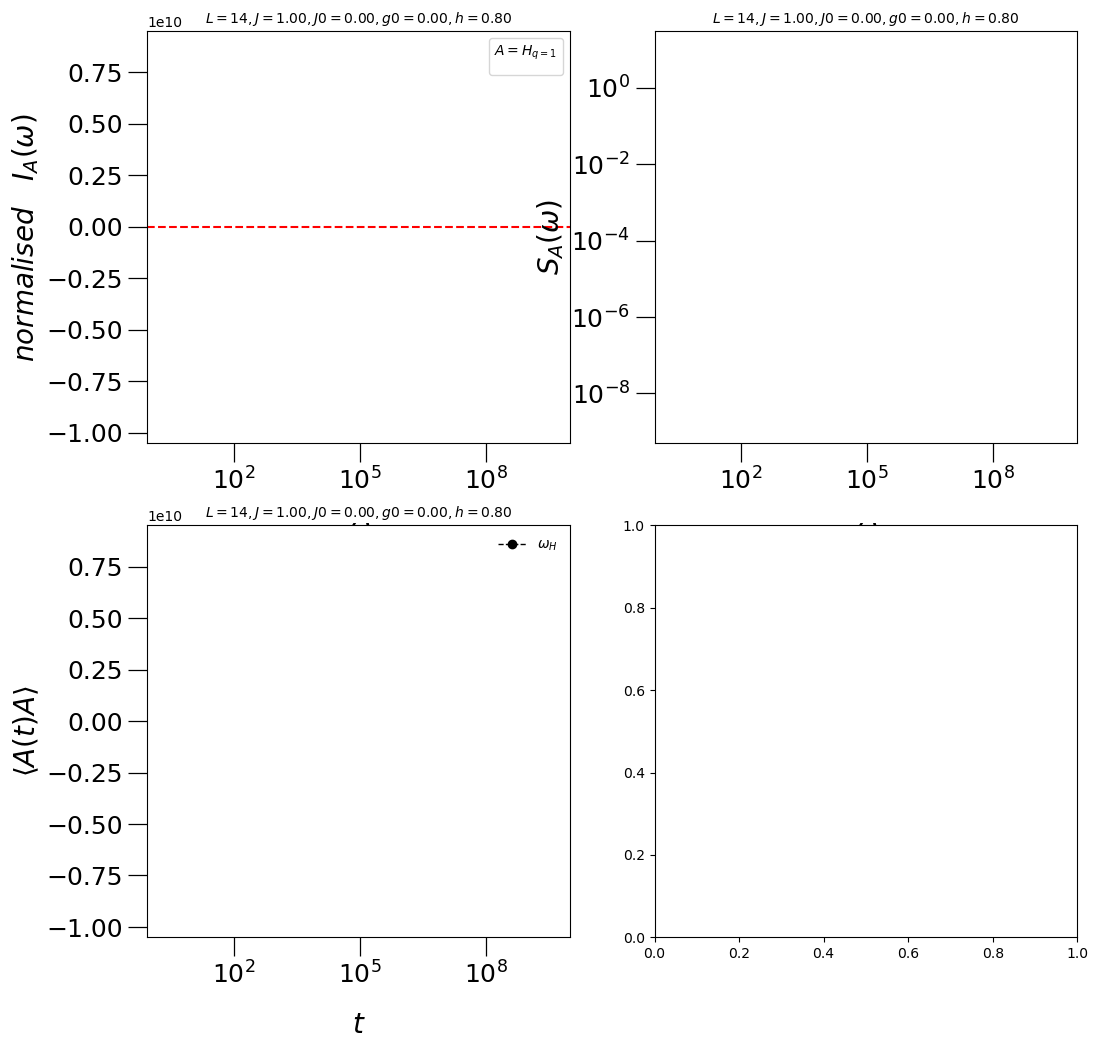

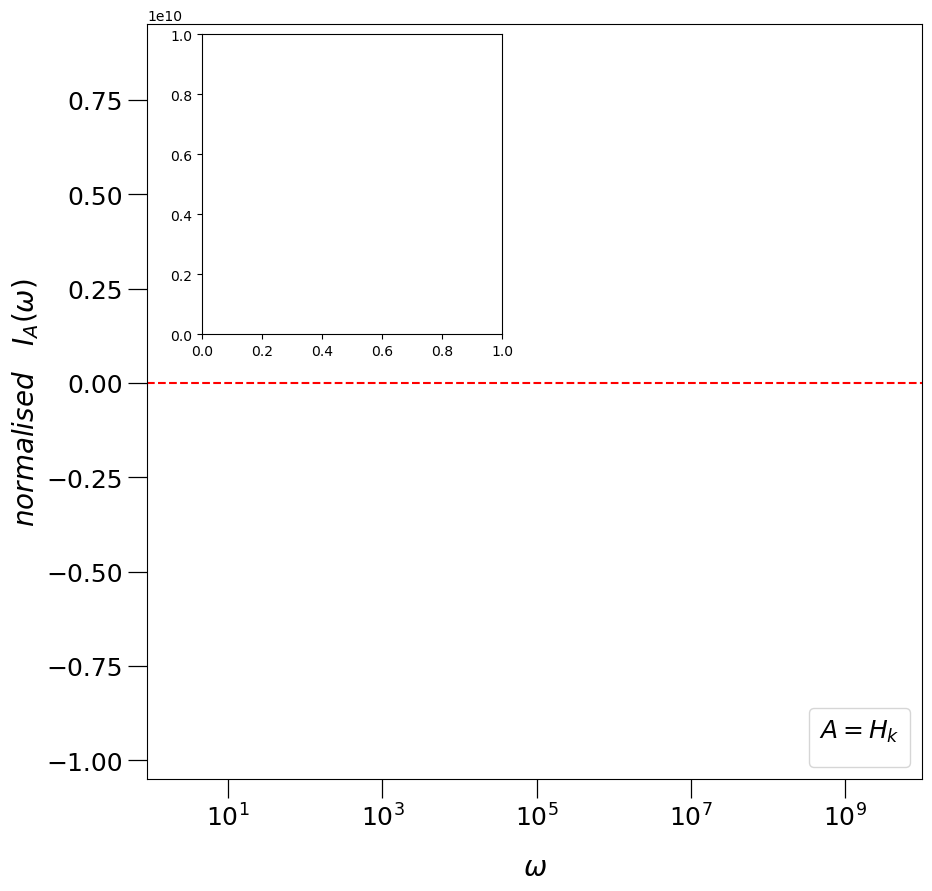

In [2593]:
use_derivative = 0
from matplotlib.lines import Line2D
def add_legend(axis):
    legend = axis.legend()
    #ax = legend.axes

    handles, labels = axis.get_legend_handles_labels()
    handles.append(Line2D([0], [0], linewidth=1, linestyle='--', marker='o', color='black'));   labels.append(r"$\omega_H$")
    #handles.append(Line2D([0], [0], linewidth=1, linestyle='--', marker='s', color='black'));   labels.append(r"$\omega_{Th}$")

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())
    axis.legend(handles, labels, frameon=False, loc='best', fontsize=10)

time_dir = cf.base_directory + "timeEvolution%s"%kPSep
int_dir = cf.base_directory + "IntegratedResponseFunction%s"%kPSep
spec_dir = cf.base_directory + ("IntegratedResponseFunction%sDERIVATIVE%s"%(kPSep,kPSep) if use_derivative else "ResponseFunction%s"%kPSep)
agp_dir = cf.base_directory + "AGP{kPSep}" + cf.op_name + kPSep;

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(12,2), dpi = 100)
axis.annotate(r"$A=$"+cf.operator_formuals[user_settings['operator']], xy=(0.5, 0.5), color='black', size=30, ha='center', va='center')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(12,12), dpi = 100)
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(10,10), dpi = 100)
func = lambda y, x: y

#---------------------- TIME EVOLUTION
spec_fun.plot_spectral(axis = ax3, dir = time_dir, settings=user_settings, xlab="t", ylab="\\langle A(t)A\\rangle", yscale='linear', normalise=False)
add_legend(axis=ax3)

#---------------------- INTEGRATED SPECTRAL FUNCTION
spec_fun.plot_spectral(axis = ax1, dir = int_dir, settings=user_settings, xlab="\\omega", ylab="I_A(\\omega)", yscale='linear', normalise=True)
add_legend(axis=ax1)
ax1.axhline(y=0.5, ls='--', color='red')
ax1.legend(title=r"$A=H_{q=1}$")

spec_fun.plot_spectral(axis = axis, dir = int_dir, settings=user_settings, xlab="\\omega", ylab="I_A(\\omega)", yscale='linear', normalise=True, func_x=func)
add_legend(axis=axis)
axis.axhline(y=0.5, ls='--', color='red')
leg = axis.legend(title=r"$A=H_{k}$", fontsize=18, loc='lower right')
leg.get_title().set_fontsize('18')
axis.title.set_text("")
#axis.set_xlim(1e-3,1e1)
#---------------------- SPECTRAL FUNCTION
spec_fun.plot_spectral(axis = ax2, dir = spec_dir, settings=user_settings, xlab="\\omega", ylab="S_A(\\omega)", yscale='log', func_x=func, seper="\t\t")
ax2.set_ylim(5e-10, 3e1)
#ax2.set_xlim(1e-4, 20)
#xval=np.logspace(-6,1,100)
#ax2.plot(xval, 3e3*xval, linestyle='--', color='black')
#ax2.plot(xval, 3e0/xval, linestyle='--', color='black')
#ax2.plot(xval, 3e0/xval**2, linestyle='--', color='red')
# Thouless energy

left, bottom, width, height = [0.18, 0.57, 0.3, 0.3]
axis2 = fig.add_axes([left, bottom, width, height])
vals = spec_fun.get_scaling_array(settings=user_settings)
print(vals)
new_set_class = copy.deepcopy(cf.plot_settings)
new_set_class.set_vs('w')
new_set_class.set_scaling('L')
cf.set_params(_w=0.1)
tau_data = thouless.load(getattr(new_set_class, 'settings'))
print(tau_data[0])
idx = list(tau_data[0]).index(cf.L)
print(tau_data[1][idx])
tau = tau_data[2][idx][0]
relax_time = []
for i in range(0, len(vals)):
    x = vals[i]
    xdata = axis.lines[i].get_xdata()
    ydata = axis.lines[i].get_ydata()
    idx = min(range(len(ydata)), key=lambda i: abs(ydata[i] - 0.5));
    relax_time.append(1. / xdata[idx])
relax_time = np.array(relax_time)
trueQ = 2 * vals / cf.L
axis2.plot(trueQ, relax_time, marker='o')
axis2.plot(trueQ, 0.4/trueQ**2., linestyle='--', color='red')
axis2.axhline(y=tau, ls='--', color='black')
axis2.annotate("$\it{Thouless}\ \it{Time}$", xy=(0.3,30), color='black', size=12)
axis2.annotate(r"$\sim \left(\frac{q}{\pi}\right)^{-2}$", xy=(0.25,7), color='red', size=12)
hfun.set_plot_elements(axis = axis2, xlim = (None, None), 
                                    ylim = (None, None),ylabel = "\\tau_{rel}", xlabel = "q/\\pi", settings=getattr(new_set_class, 'settings'), font_size=10, set_legend=True)
  
axis2.set_yscale('log')
axis2.set_xscale('log')
axis2.tick_params(axis='both', which='both',length=2)
axis2.xaxis.set_minor_locator(plt.MultipleLocator(0.2))
def format_func(value, tick_number):
    return "%.1f"%value
def format_func2(value, tick_number):
    return "%d"%value
axis2.xaxis.set_minor_formatter(plt.FuncFormatter(format_func))
axis2.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
axis2.yaxis.set_major_formatter(plt.FuncFormatter(format_func2))

#ax2.plot(taus, spec_at_tau, linestyle='--', marker='s', color='black')
#ax1.plot(taus2, int_at_tau, linestyle='--', marker='s', color='black')
#ax3.plot(1. / taus2, time_at_tau, linestyle='--', marker='s', color='black')
#
#---------------------- ADIABATICS
#new_set_class = copy.deepcopy(cf.plot_settings)
#new_set_class.set_vs(cf.plot_settings.settings['scaling'])
#new_set_class.set_scaling("L")
#new_set_class.set_scales(xscale='log', yscale='log')
#plot_agp(axis = ax4, settings_class=new_set_class, which=2)
#ax4.set_ylim(1e2, 1e5)

(1e-05, 0.01)

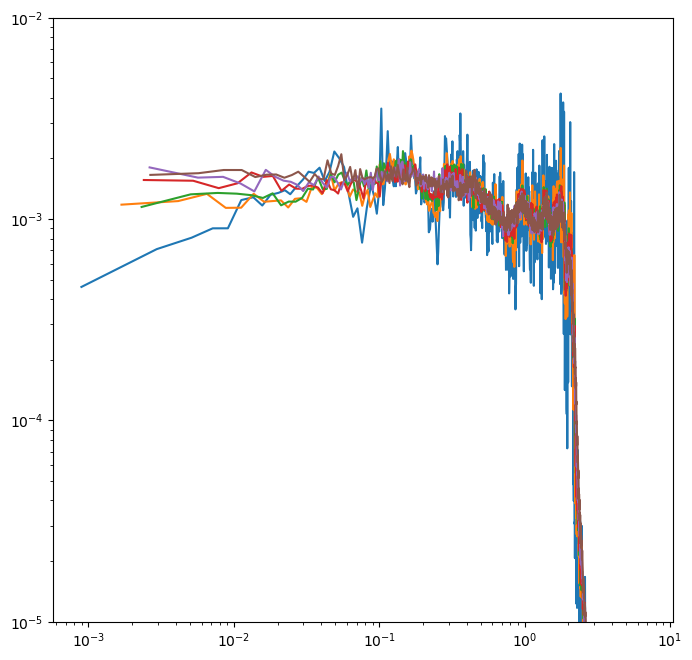

In [2595]:
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(8,8), dpi = 100)

vals = []
for x in range(0, 20): vals.append(0.05 + x * 0.05)
for w in vals:
    filename = "SigmaZ_j=1_L=12,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=%.2f.dat"%w
    if exists(filename):
        data = pd.read_table(filename, sep="\t", header=None)
        ax.plot(data[0], data[1], label=hfun.key_title(w, user_settings))
ax.set_legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-5,1e-2)